In [8]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d}"
today

'2022-10-18'

In [9]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.utils.data as data_utils
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import torch.nn.functional as F
import math
#import gpytorch

import urllib.request
import os.path
from scipy.io import loadmat
from math import floor
import anndata
# Make plots inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['floor']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [10]:
torch.manual_seed(1)    # reproducible

In [11]:
import scCAMEL as scm
from scCAMEL import CamelPrefiltering
from scCAMEL import CamelSwapline

# Read and prefiltering data

In [404]:
cd F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\MacaqueRef

F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\MacaqueRef


In [406]:
scref=anndata.read("20220808LuoHuman_Fit_MacaqueRefHumanized.h5ad")

In [407]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values'

In [408]:
set(scref.obs["Cluster"])

{'hAb.LTMR',
 'hAd.LTMR',
 'hC.LTMR',
 'hNP1',
 'hNP2',
 'hPEP.0',
 'hPEP.CHRNA7',
 'hPEP.KIT',
 'hPEP.NTRK3',
 'hPEP.PIEZO2h',
 'hPEP.SST',
 'hPEP.V1/A1.1',
 'hPEP.V1/A1.2',
 'hPropr',
 'hTRPM8',
 'hUN'}

In [409]:
scref.obs.groupby(["Cluster"]).count()

,Cluster_HH,Cluster_DU,orig.ident,nCount_RNA,nFeature_RNA,sample_id,donor,drg_location,drg_level,batch,...,percent.mt,cell.ID.x,cl.conserv,cl.HC.LC.split,cl.Ab.split.3,cl.Ab.split.4,mtrain_index,color,PredictCluster,ClusterConsistanceScore
Cluster,,,,,,,,,,,,,,,,,,,,,
hAb.LTMR,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
hAd.LTMR,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
hC.LTMR,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
hNP1,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
hNP2,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
hPEP.0,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
hPEP.CHRNA7,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
hPEP.KIT,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
hPEP.NTRK3,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67


In [410]:
scref.uns['refcolor_dict']={"hAb.LTMR": array([171, 163,   0]),
 'hAd.LTMR': array([ 12, 183,   2]),
 'hC.LTMR': array([255, 153, 255]),
 'hNP1': array([  102, 102, 255]),
 'hNP2': array([  0, 169, 255]),
 'hPEP.SST': array([132, 148, 255]),
 'hPEP.0': array([220, 198, 110]),
 'hPEP.PIEZO2h': array([255, 153, 51]),
 'hPEP.V1/A1.2': array([255, 102, 178]),
 'hPEP.CHRNA7': array([255, 51, 51]),
 'hPEP.NTRK3': array([237, 104, 237]),
 'hPEP.V1/A1.1': array([199, 124, 255]),
 'hPEP.KIT': array([255, 104, 161]),
 'hPropr': array([124, 174,   0]),
 'hTRPM8': array([0, 184, 231]),
 'hUN': array([146, 142, 143])}

In [411]:
scref.obs

,Cluster_HH,Cluster_DU,orig.ident,nCount_RNA,nFeature_RNA,sample_id,donor,drg_location,drg_level,batch,...,cell.ID.x,cl.conserv,cl.HC.LC.split,cl.Ab.split.3,cl.Ab.split.4,Cluster,mtrain_index,color,PredictCluster,ClusterConsistanceScore
N2-RL5-1,PEP1.3,PEP.H4.15,SeuratProject,644488.4,9928,N2-RL5-1,N2,lumbar 5,lumbar,1,...,N2-RL5-1,PEP.H4.15,PEP.H4.15,PEP.H4.15,PEP.H4.15,hPEP.V1/A1.2,12,#ff66b2,hPEP.V1/A1.1,0
N2-RL5-2,PEP1.3,PEP1.3,SeuratProject,687921.8,10554,N2-RL5-2,N2,lumbar 5,lumbar,1,...,N2-RL5-2,PEP1.3,PEP1.3,PEP1.3,PEP1.3,hPEP.V1/A1.1,11,#c77cff,hPEP.V1/A1.1,1
N2-RL5-3,Propr,Propr,SeuratProject,483457.3,7772,N2-RL5-3,N2,lumbar 5,lumbar,1,...,N2-RL5-3,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N2-RL5-4,PEP0,PEP.0,SeuratProject,370380.9,7871,N2-RL5-4,N2,lumbar 5,lumbar,1,...,N2-RL5-4,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1
N2-RL5-5,PEP1.3,PEP1.3,SeuratProject,410751.7,6371,N2-RL5-5,N2,lumbar 5,lumbar,1,...,N2-RL5-5,PEP1.3,PEP1.3,PEP1.3,PEP1.3,hPEP.V1/A1.1,11,#c77cff,hPEP.V1/A1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N4-RT12-190,PEP0,A.beta.s.Raw,SeuratProject,522232.1,4889,N4-RT12-190,N4,thoracic 12,thoracic,3,...,N4-RT12-190,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1
N4-RT12-191,Propr,Propr,SeuratProject,726087.7,12682,N4-RT12-191,N4,thoracic 12,thoracic,3,...,N4-RT12-191,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N4-RT12-192,Propr,Propr,SeuratProject,408140.4,8653,N4-RT12-192,N4,thoracic 12,thoracic,3,...,N4-RT12-192,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N4-RT12-193,PEP.H4,PEP.H4,SeuratProject,550100.8,11649,N4-RT12-193,N4,thoracic 12,thoracic,3,...,N4-RT12-193,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1


In [412]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values'

In [413]:
path='F:/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
#dfpfc2= prefilteringTest.prefilter(df_f=dfpfc,filename=filename, path=path)
scref= scm.CamelPrefiltering.prefilter(datax=scref,filename=filename, path=path)

CamelRunning_Prefilter......
CamelRunning_Prefilter......Finished


In [414]:
scref=scm.CamelPrefiltering.DataScaling(scref)

In [415]:
dfdev2=pd.DataFrame(scref.X,index=scref.obs.index,columns=scref.var.index).T
dfdev2=dfdev2.loc[scref.var['Filter1']==True]
dfdev2.shape

(27751, 1066)

In [416]:
markerlist=scm.CamelSwapline.enrichmentscoreBETA(dfpfcclus=scref.obs["Cluster"], df_dev=dfdev2, fc=3, pvalcutoff=0.1, shortcut=True)

Camel...Running: clusteringValue1...
Camel...Running: clusteringValue2...
5203
[Processing16
Camel...Running: CrossChecking...
-0%--6%--12%--18%--25%--31%--37%--43%--50%--56%--62%--68%--75%--81%--87%--93%-Camel...Running: output genelist...


In [417]:
markerlist2=list(set(markerlist))
len(markerlist2)

7236

In [419]:
scref, score,  thrs, ax=scm.CamelPrefiltering.MVgene(datax=scref,wt=3, markerlist=markerlist2,
                                                  plotfig=True, Xlow=-8.5, Xhigh=6.5, Ylow=-2, Yhigh=6.5,alphaValue=0.9, sValue=30,
           fig_args={'figsize': (8, 8), 'facecolor': 'white', 'edgecolor': 'white'})
len(scref.var.index[scref.var["MVgene"]])

11055

In [420]:
scref2=scref

In [421]:
scref =scm.CamelPrefiltering.MVgene_Scaling(datax=scref2,score=score,
                                                                   thrs=thrs, TPTT=100000,     mprotogruop=scref.obs["Cluster"].values,commongene=None,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="f:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")



CamelRunning---GenesScaling......


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:478: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:479: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:481: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:482: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_de

CamelRunning---TrainingGenesScaling......Finished


In [422]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

# Neural-Network learning

In [423]:
#import SCMprefiltering138 as SCMpref
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=150,
    learningRate=0.0025,
    verbose=0,
    optimizerMmentum=0.95,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cuda.......
CamelRunning---NNclasffier_in_cuda.......Finished


# Accuracy plot, the overall clustering accuracy is ~88%

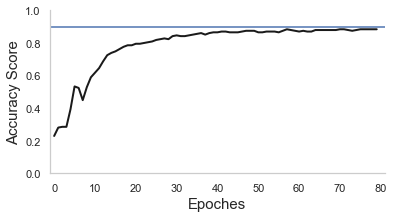

In [547]:
#import SCMprefiltering229 as SCMpref
ax=scm.CamelPrefiltering.AccuracyPlot( nnModel=net, accCutoff=0.9,
                 Xlow=-1, Ylow=0.0, Yhigh=1,
               )
plt.savefig("%s_accuracyCurve_HumanRef_Merged_cluster.svg"%today,bbox_inches='tight')

# Make predition and visualization in Radar plot

In [425]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=80,
    learningRate=0.0025,
    verbose=0,
    optimizerMmentum=0.95,
    dropout=0.3,
    #imizer__nesterov=True,
 )

CamelRunning---NNclasffier_in_cuda.......
CamelRunning---NNclasffier_in_cuda.......Finished


In [426]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

In [427]:
scref=scm.CamelSwapline.addcolor(datax=scref,clustername="Cluster", colorcode="color")

In [428]:
scref.obs

,Cluster_HH,Cluster_DU,orig.ident,nCount_RNA,nFeature_RNA,sample_id,donor,drg_location,drg_level,batch,...,cell.ID.x,cl.conserv,cl.HC.LC.split,cl.Ab.split.3,cl.Ab.split.4,Cluster,mtrain_index,color,PredictCluster,ClusterConsistanceScore
N2-RL5-1,PEP1.3,PEP.H4.15,SeuratProject,644488.4,9928,N2-RL5-1,N2,lumbar 5,lumbar,1,...,N2-RL5-1,PEP.H4.15,PEP.H4.15,PEP.H4.15,PEP.H4.15,hPEP.V1/A1.2,12,#ff66b2,hPEP.V1/A1.1,0
N2-RL5-2,PEP1.3,PEP1.3,SeuratProject,687921.8,10554,N2-RL5-2,N2,lumbar 5,lumbar,1,...,N2-RL5-2,PEP1.3,PEP1.3,PEP1.3,PEP1.3,hPEP.V1/A1.1,11,#c77cff,hPEP.V1/A1.1,1
N2-RL5-3,Propr,Propr,SeuratProject,483457.3,7772,N2-RL5-3,N2,lumbar 5,lumbar,1,...,N2-RL5-3,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N2-RL5-4,PEP0,PEP.0,SeuratProject,370380.9,7871,N2-RL5-4,N2,lumbar 5,lumbar,1,...,N2-RL5-4,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1
N2-RL5-5,PEP1.3,PEP1.3,SeuratProject,410751.7,6371,N2-RL5-5,N2,lumbar 5,lumbar,1,...,N2-RL5-5,PEP1.3,PEP1.3,PEP1.3,PEP1.3,hPEP.V1/A1.1,11,#c77cff,hPEP.V1/A1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N4-RT12-190,PEP0,A.beta.s.Raw,SeuratProject,522232.1,4889,N4-RT12-190,N4,thoracic 12,thoracic,3,...,N4-RT12-190,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1
N4-RT12-191,Propr,Propr,SeuratProject,726087.7,12682,N4-RT12-191,N4,thoracic 12,thoracic,3,...,N4-RT12-191,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N4-RT12-192,Propr,Propr,SeuratProject,408140.4,8653,N4-RT12-192,N4,thoracic 12,thoracic,3,...,N4-RT12-192,Propr,Propr,Propr,Propr,hPropr,13,#7cae00,hPropr,1
N4-RT12-193,PEP.H4,PEP.H4,SeuratProject,550100.8,11649,N4-RT12-193,N4,thoracic 12,thoracic,3,...,N4-RT12-193,PEP.H0,PEP.H0,PEP.H0,PEP.H0,hPEP.0,5,#dcc66e,hPEP.0,1


In [429]:
cd F:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2

F:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2


In [430]:
refcolor_dict=scref.uns["refcolor_dict"]

In [431]:
scpdt=SCMtemp.addcolor(datax=scref,clustername="Cluster", colorcode="color",predef=refcolor_dict)

In [432]:
scref.uns["mwanted_order"] =list(sort(list(set(scref.obs["Cluster"]))))

In [542]:
cd F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\HumanRef

F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\HumanRef


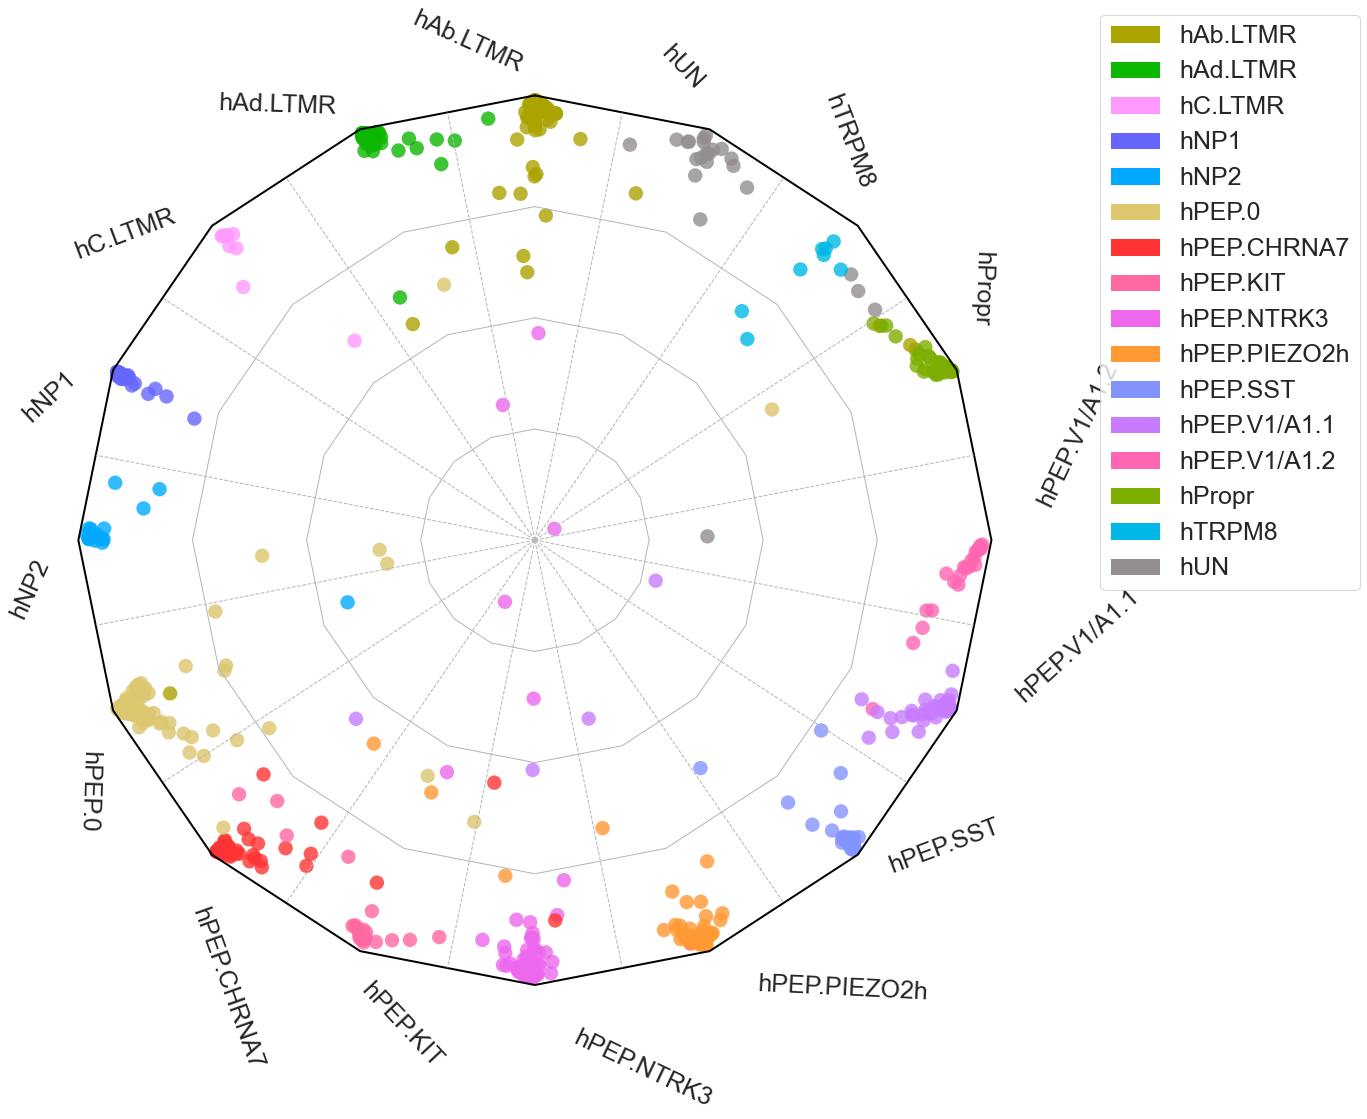

In [434]:
scref=scm.CamelSwapline.prediction(datax=scref, mcolor_dict=scref.uns["refcolor_dict"] ,net=net,learninggroup="train", radarplot=True,fontsizeValue=18,
                       ncolnm=3, bbValue=(1.2, 1.05)  )
plt.savefig("%s_RadarPlot_HumanRef_Merged_cluster.pdf"%today,bbox_inches='tight')

In [435]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

dfpfcclus = scref.obs[["mtrain_index","Cluster"]].T
dfpfcclus

In [436]:
#######################
#######################
#Multiplot_Violin
# each column along X axis represents a cell type, and the y-axis represents the cell-type probability
# each column along X axis contain all cells in the training, shown as dots with different colors
# in the perfect condition， only the cells of the same cell-type column will reach to the maxium (100%) probability, all other cells will be 0 probability
#however, in each cell-type column, some cells from other cell types may exhibit high probability, two reasons: 1. they may shared some features with this---
# cell-type, and these features drag them to the current cell-type; 2. they are inproperly classified due to many factors, such as low quality data, different clustering algorithm..... 
#######################
#######################

# permutation control

In [440]:
## the whole data matrix is randomized, the red X represents 95% conficence of each cell-type

<Figure size 432x288 with 0 Axes>

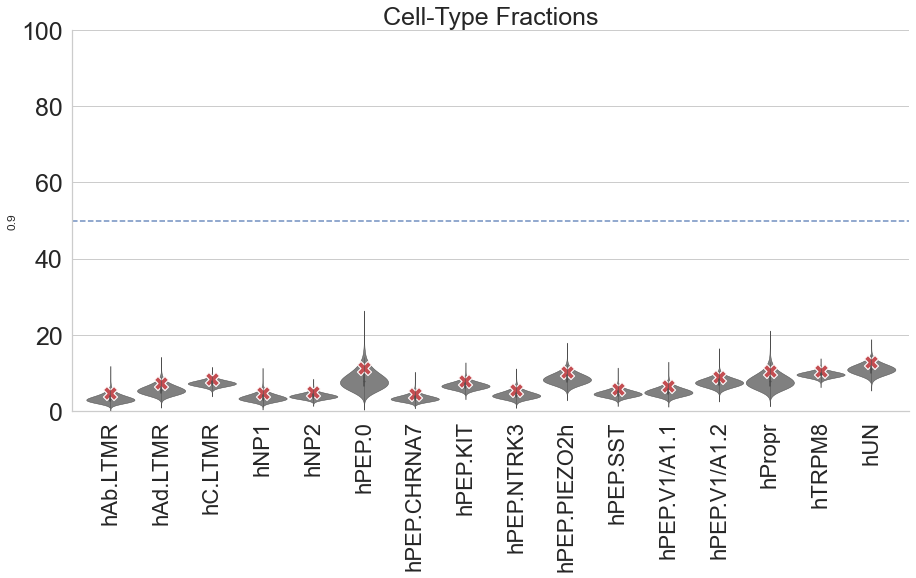

In [441]:
dftest0, ratiodf=scm.CamelSwapline.permutationTest(datax=scref,net=net,num=50, plotshow=True)

# Calculate the marker genes via interpretable learning

In [72]:
#the marker genes are caculated via interpretable learning

In [460]:
scref.uns["train_set_gene"].shape

(10443,)

In [462]:
scref.obsm["test_set_values"].shape

(1066, 10671)

In [464]:
scref.obs.index.shape

(1066,)

In [453]:
scref=scm.CamelSwapline.ConstrualValue(datax=scref,net=net,filepath="", 
                                       ConstrualModel="DeepLift",MarkerGeneFinder=False,fcV=2, pValCutOff = 0.1)
scref.obsm['test_set_values'].shape

(1066, 10671)

In [454]:
scpdt.obsm['test_set_values'].shape

(1066, 10671)

# Cluster consistency and accuracy

In [442]:
######
#use the defined cell-type as reference, to compare the predicted cell-type of each cell, if the predicted cell-type of this cell is same as the original 
#defined cell-type, the clustered cell is defined as consistently assigned,otherwise, this cell is inconsistent assigned, indicating a possibly incorrect clustering
# outputfile: the inconsistent cell ID, the original defined cell-type, and the predicted cell-type
#output plot: the ratio (%) of correct defined cell-type (consistent) and incorrect cell-type (inconsistent) 

######

In [443]:
len(set(scref.obs.index))

1066

In [444]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelSwapline.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfprob1=dfprob1posi.append(dfprob1neg)


<Figure size 1800x720 with 0 Axes>

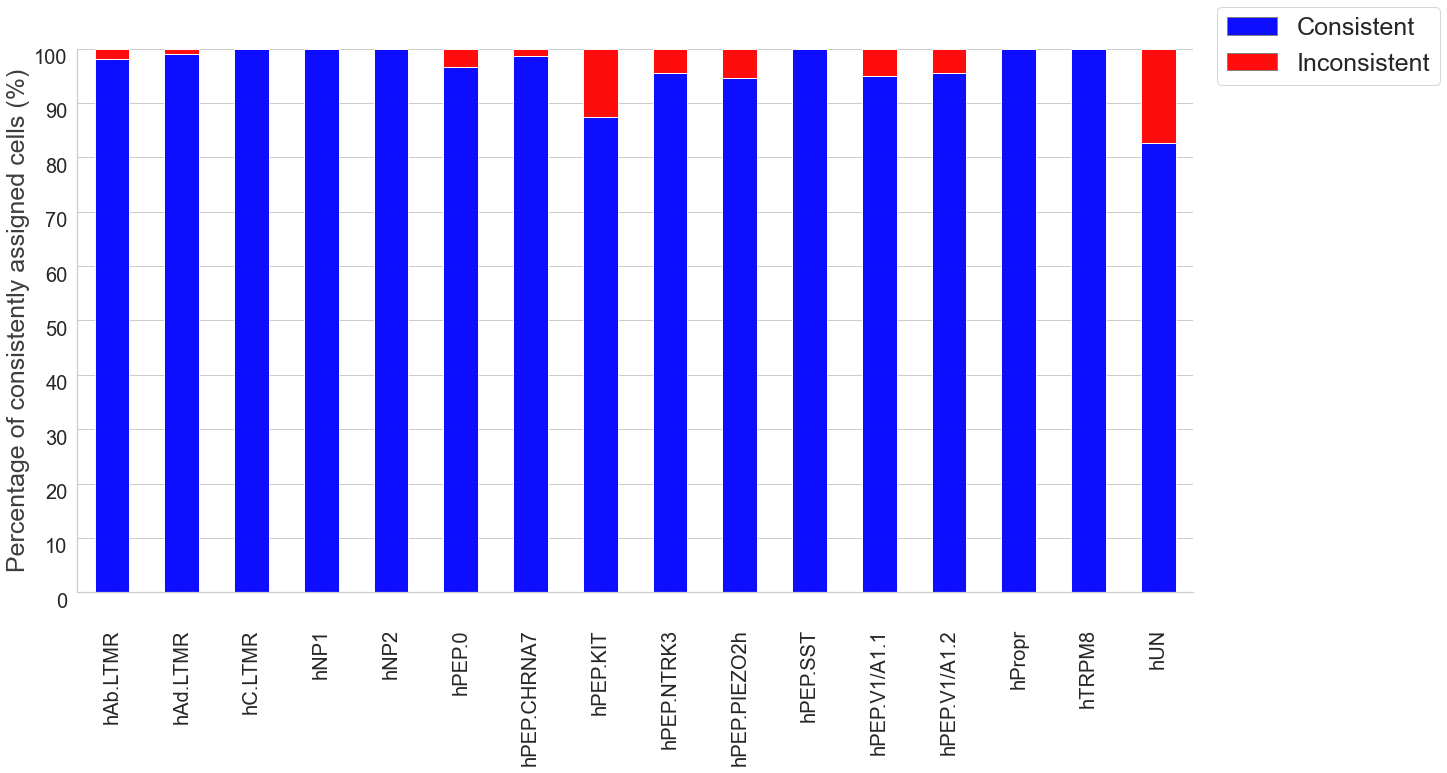

In [548]:
scref=scm.CamelSwapline.ConsistantAssign(datax=scref,dfsig=dftest0,outputfilepath="%sHumanDRG_Ref_InconsistantCells.csv"%today,outputPlot=True )
plt.savefig("%s_CellTypeConsistency_HumanRef_Merged_cluster.svg"%today,bbox_inches='tight')

# Cell_Type Purity

In [133]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

F:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2\SW2main173.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsort["Purity"][:(kn.knee + 1)] = 0


<Figure size 432x288 with 0 Axes>

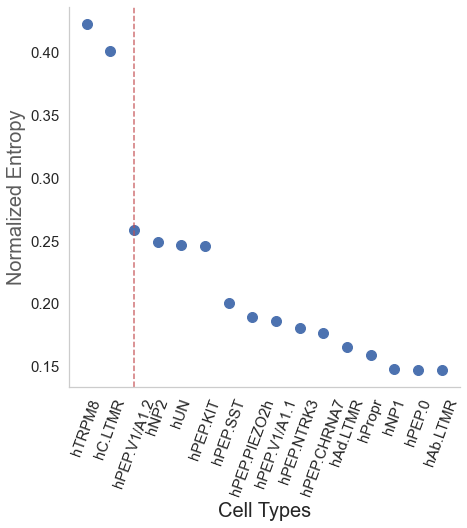

In [549]:
dfpurity=SCMtemp.PurityEstimation (datax=scref, clusterlist="Cluster", PCnum=5, figureplot=True)


F:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2\SW2main172.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsort["Purity"][:(kn.knee + 1)] = 0


<Figure size 432x288 with 0 Axes>

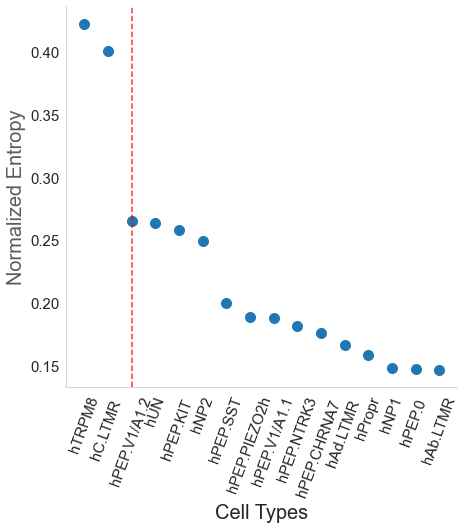

In [135]:
dfpurity=SCMtemp.PurityEstimation (datax=scref, clusterlist="PredictCluster", PCnum=5, figureplot=True)

# association between cell-types

In [136]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

In [137]:
# the heatmap of hierarchical clustering represents the cell-type similarity or association
#color from dark purple to light yellow represents the association from low to high
#number inside of eahc square indicating the association value.

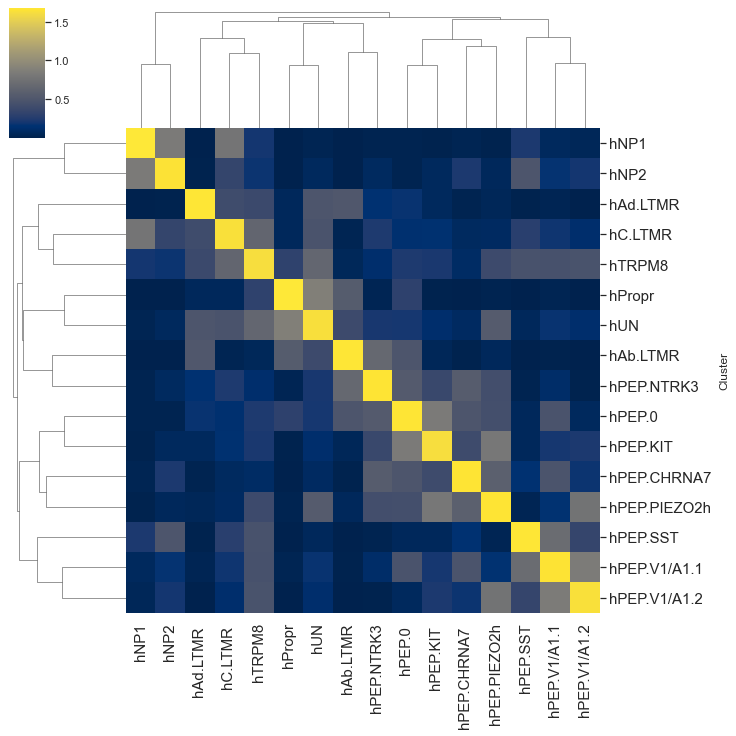

In [139]:
SCMtemp.CellTypeSimilarity(datax=scref, labelnum=False,  metricvalue='correlation',methodvalue="complete")

# Save data

In [227]:
cd F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\HumanRef

F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\HumanRef


In [228]:
scref

AnnData object with n_obs × n_vars = 1066 × 39757
    obs: 'Cluster_HH', 'Cluster_DU', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'donor', 'drg_location', 'drg_level', 'batch', 'diameter', 'percent.mt', 'cell.ID.x', 'cl.conserv', 'cl.HC.LC.split', 'cl.Ab.split.3', 'cl.Ab.split.4', 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

# Prediction

# Macaque_Cluster

In [342]:
cd F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\MacaqueRef

F:\Dropbox\data\proj\PE_HYZ\PublicDataSet\DRG_luo_Human\FinalCluster\MacaqueRef


In [343]:
scpdt=anndata.read("2022-08-08MacaqueDRG_Ref_MergeCluster.h5ad")

In [344]:
set(scpdt.obs["Cluster"])

{'Macq_A-LTMR',
 'Macq_C-LTMR',
 'Macq_NP1',
 'Macq_NP2',
 'Macq_NP3',
 'Macq_PEP1',
 'Macq_PEP2',
 'Macq_PEP3',
 'Macq_TrpM8'}

In [345]:
scpdt.var.index

Index(['PGBD2-loc1', 'LOC114674980', 'ZNF692', 'LOC114678402', 'ZNF672',
       'SH3BP5L', 'LOC106995359', 'MIR3124', 'LYPD8', 'LOC106995355',
       ...
       'TSPY10', 'TSPY8', 'TSPY4/TSPY1', 'TTTY20', 'LOC106995447', 'RBMY1A3P',
       'RBMY2EP', 'LOC114671701', 'LOC106995445', 'LOC100271729'],
      dtype='object', length=45794)

In [346]:
scpdt.X.std()

449.8144182744742

In [347]:
scpdt2=scpdt.copy()
scpdt2.X=scpdt.X*(scref.X.std()/scpdt2.X.std())

In [352]:
#import SCMprefiltering42 as SCMpref
scpdt =scm.CamelPrefiltering.MVgene_Scalng(datax=scpdt2,TPTT=1000000,   commongene=scref.var.index.tolist(),  
                                        sharedMVgenes=scref.uns[ 'train_set_gene'].tolist(),
                                                                                            std_scaling=True,score=None, thrs=None,  mprotogruop=None,
    tftable="f:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="test")



CamelRunning---GenesScaling......


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:507: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


CamelRunning---TestGenesScaling......Finished


In [354]:
list(sort(list(set(scpdt.obs["Cluster"]))))

['Macq_A-LTMR',
 'Macq_C-LTMR',
 'Macq_NP1',
 'Macq_NP2',
 'Macq_NP3',
 'Macq_PEP1',
 'Macq_PEP2',
 'Macq_PEP3',
 'Macq_TrpM8']

In [355]:
scref.uns["refcolor_dict"]

{'hAb.LTMR': array([171, 163,   0]),
 'hAd.LTMR': array([ 12, 183,   2]),
 'hC.LTMR': array([255, 153, 255]),
 'hNP1': array([102, 102, 255]),
 'hNP2': array([  0, 169, 255]),
 'hPEP.0': array([220, 198, 110]),
 'hPEP.CHRNA7': array([255,  51,  51]),
 'hPEP.KIT': array([255, 104, 161]),
 'hPEP.NTRK3': array([237, 104, 237]),
 'hPEP.PIEZO2h': array([255, 153,  51]),
 'hPEP.SST': array([132, 148, 255]),
 'hPEP.V1/A1.1': array([199, 124, 255]),
 'hPEP.V1/A1.2': array([255, 102, 178]),
 'hPropr': array([124, 174,   0]),
 'hTRPM8': array([  0, 184, 231]),
 'hUN': array([146, 142, 143])}

In [356]:
scpdt.uns["mwanted_order"] =list(sort(list(set(scpdt.obs["Cluster"]))))

In [357]:
scpdt.uns["mwanted_order"]

['Macq_A-LTMR',
 'Macq_C-LTMR',
 'Macq_NP1',
 'Macq_NP2',
 'Macq_NP3',
 'Macq_PEP1',
 'Macq_PEP2',
 'Macq_PEP3',
 'Macq_TrpM8']

In [358]:
scpdt

AnnData object with n_obs × n_vars = 1038 × 45794
    obs: 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'

In [359]:
scpdt.uns["refcolor_dict"]={'Macq_A-LTMR': array([139, 241,  98]),
 'Macq_C-LTMR': array([247, 150,  45]),
 'Macq_NP1': array([ 24, 198, 127]),
 'Macq_NP2': array([119, 127,   0]),
 'Macq_NP3': array([ 53, 129, 222]),
 'Macq_PEP1': array([175,  17, 177]),
 'Macq_PEP2': array([138, 212, 231]),
 'Macq_PEP3': array([ 26,  96, 210]),
 'Macq_TrpM8': array([ 64, 216,  56])}

In [360]:
pd.Series(scpdt.uns["refcolor_dict"])

Macq_A-LTMR     [139, 241, 98]
Macq_C-LTMR     [247, 150, 45]
Macq_NP1        [24, 198, 127]
Macq_NP2         [119, 127, 0]
Macq_NP3        [53, 129, 222]
Macq_PEP1       [175, 17, 177]
Macq_PEP2      [138, 212, 231]
Macq_PEP3        [26, 96, 210]
Macq_TrpM8       [64, 216, 56]
dtype: object

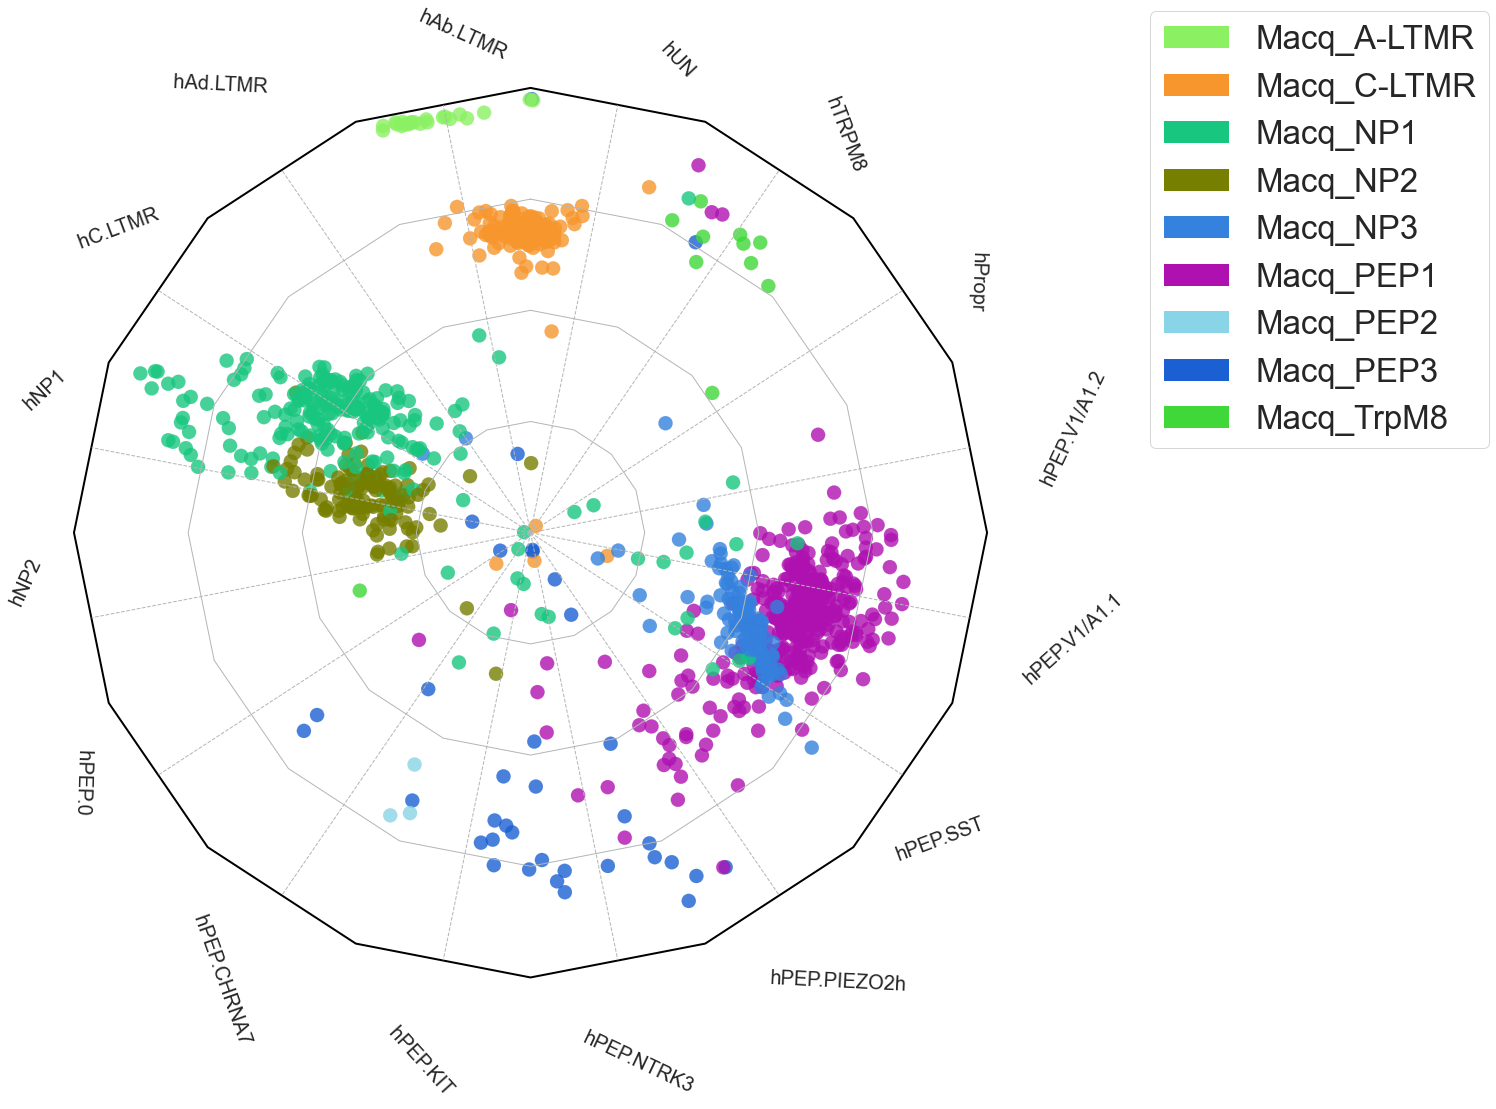

In [361]:
#import SW2main82 as SCM
test=scm.CamelSwapline.prediction(datax=scpdt, mcolor_dict=pd.Series(scpdt.uns["refcolor_dict"]),
                                  net=net,learninggroup="test", radarplot=True, fontsizeValue=35,
              datarefplot=scref,               ncolnm=1, bbValue=(1.1, 1.05))

In [362]:
scpdt

AnnData object with n_obs × n_vars = 1038 × 45794
    obs: 'Cluster', 'mtrain_index', 'color', 'PredictCluster', 'ClusterConsistanceScore'
    var: 'RefGeneList', 'Filter1', 'MVgene'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values', 'train_set_values'